In [2]:
import pandas
from datetime import datetime, timedelta

def dates_between(start, end):
    diff = end - start
    for t in range(diff.days + 1):
        yield start + timedelta(t)

def row_expand(row):
    return pandas.Series()
    start = datetime.strptime(row["Fecha de Zarpada"], '%d/%M/%Y')
    end = datetime.strptime(row["Fecha de Desembarque"],'%d/%M/%Y')
    return pandas.Series(["hola" + str(d) for d in dates_between(start, end)])

data = pandas.read_csv("partes.csv")

import csv
with open('partes-extendido.csv', 'w', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=data.keys())
    writer.writeheader()
    for index,row in data.iterrows():
        row = dict(row)
        kilos = row["Kilos"]
        lances = row["Lances"]
        start = datetime.strptime(row["Fecha de Zarpada"], '%d/%M/%Y')
        end = datetime.strptime(row["Fecha de Desembarque"],'%d/%M/%Y')
        dates = list(dates_between(start, end))
        for date in dates:
            row["Fecha de Zarpada"] = "{:%d/%M/%Y}".format(date)
            row["Fecha de Desembarque"] = "{:%d/%M/%Y}".format(date)
            row["Kilos"] = kilos / len(dates)
            row["Lances"] = lances / len(dates)
            writer.writerow(row)

In [78]:
#data = pandas.read_csv("partes-extendido.csv")
data = pandas.read_csv("partes.csv")
#data = pandas.read_csv("mat2mart.csv")

In [93]:
dataPlot.index

Float64Index([-57.25, -56.75, -56.25, -55.25, -54.75, -54.25, -53.75, -53.25,
              -52.75, -52.25, -51.75, -51.25, -50.75, -50.25, -49.75, -49.25,
              -48.75, -48.25, -47.75, -47.25, -46.75, -46.25, -45.75,  -45.5,
              -45.25, -44.75, -44.25, -43.75, -43.25, -42.75, -42.25, -41.75,
              -41.25, -40.75, -40.25, -39.75, -39.25, -38.75, -38.25, -37.75,
               -37.5, -37.25, -36.75, -36.25, -35.75, -35.25, -34.75,  -34.5,
              -34.25],
             dtype='float64', name='RecLat')

In [163]:
prop = "Kilos"
data2 = data
#data2 = data[data["Especie"] == "LANGOSTINO (LAA)"]
#data2 = data[data["Especie"] == "MERLUZA HUBBSI (HKP)"]
#data2 = data[data["Especie"] == "ABADEJO (CUS)"]
#data2 = data[data["Especie"] == "SALMON DE MAR (UPR)"]
#data2 = data[data["Especie"] == "RAYAS NEP (SRX)"]
#data2 = data[data["Buque Flota"] == "NO IDENTIFICADO"]
data3 = data2[['RecLat', 'RecLon', prop]].groupby(['RecLat', 'RecLon']).sum().reset_index()
dataPlot = data3.pivot_table(index='RecLat', columns='RecLon', values=prop, fill_value=0)

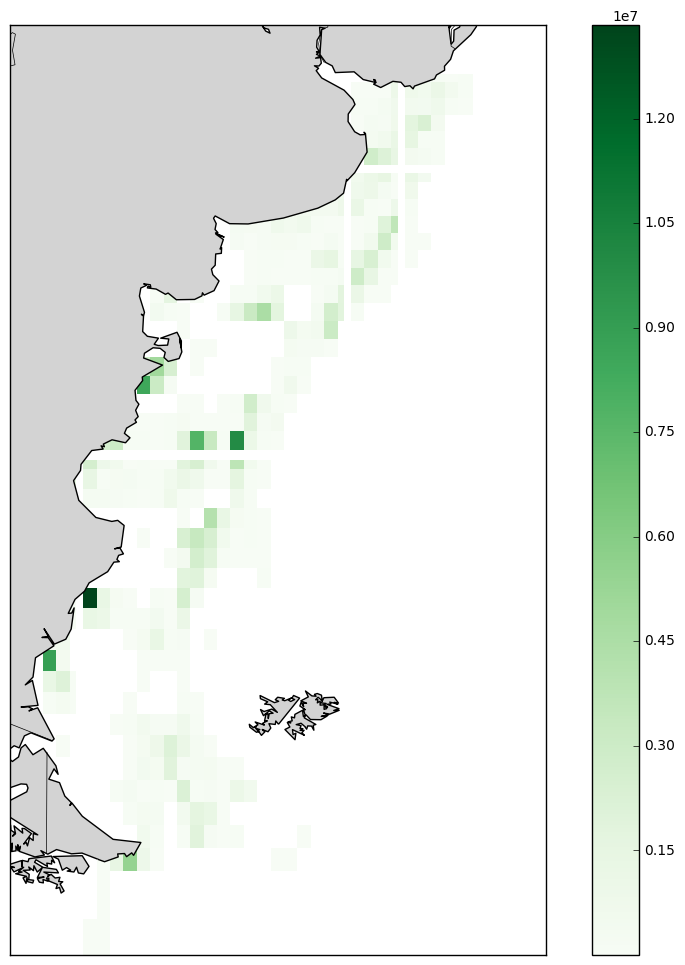

In [181]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib
import matplotlib.colors
import matplotlib.pyplot as plt
import numpy as np
from numpy import linspace, meshgrid

matplotlib.rcParams['figure.figsize'] = (12,12)
 
map = Basemap(projection='merc',
              resolution='l',
              llcrnrlon=-70, llcrnrlat=-57,
              urcrnrlon=-50, urcrnrlat=-33)

lats = dataPlot.index
lons = dataPlot.columns
map.drawcoastlines()
map.drawcountries()
map.drawmapboundary()
if False:
    map.drawmeridians(lons)
    map.drawparallels(lats)
map.fillcontinents(color='lightgray')

x, y = meshgrid(lons, lats)

cmap="Greens"
map.pcolormesh(x, y, dataPlot, latlon=True, cmap=cmap, vmin=1)
plt.cm.get_cmap(cmap).set_under('white')
plt.colorbar()

plt.show()